# Images with Minimal Background

**Scott Prahl**

**March 2020, Version 2**

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

pixel_size_mm = 3.75/1000           # pixel size in mm for the camera

## Closely centered beam

Bright center, low background.  Beam is roughly 1/10 of the entire image.  Could not be easier.  

This is a Helium-Neon laser beam that is operating close to the TEM$_{00}$ mode.

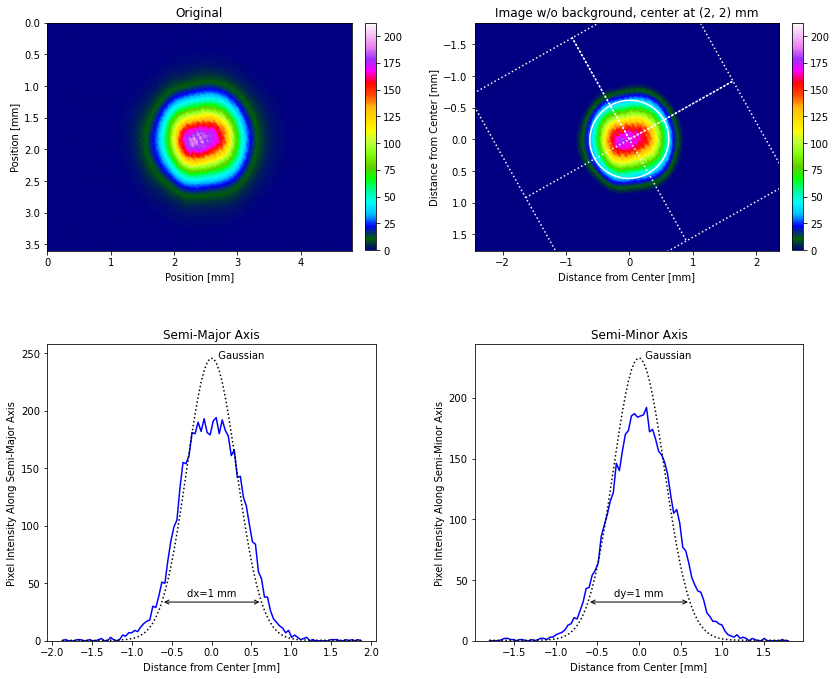

In [2]:
beam = imageio.imread("t-hene.pgm")
lbs.visual_report(beam, pixel_size = pixel_size_mm, units='mm')
plt.show()

Further analysis of this beam image can be found in the Jupyter notebook on the [razor blade technique](05-Razor-Blade.html)

## Twelve different images near focus

This shows how the default ISO 11146 algorithm works with a good set of images.  

These are reasonably centered noise-free images measured near the focus of a beam.  

In [3]:
# array of distances at which images were collected
z1 = np.array([168,210,280,348,414,480,495,510,520,580,666,770],dtype=float) #mm

# array of filenames associated with each image
fn1 = ["t-%dmm.pgm" % number for number in z1]

# read them all into memory 
test_img = [imageio.imread(fn) for fn in fn1]

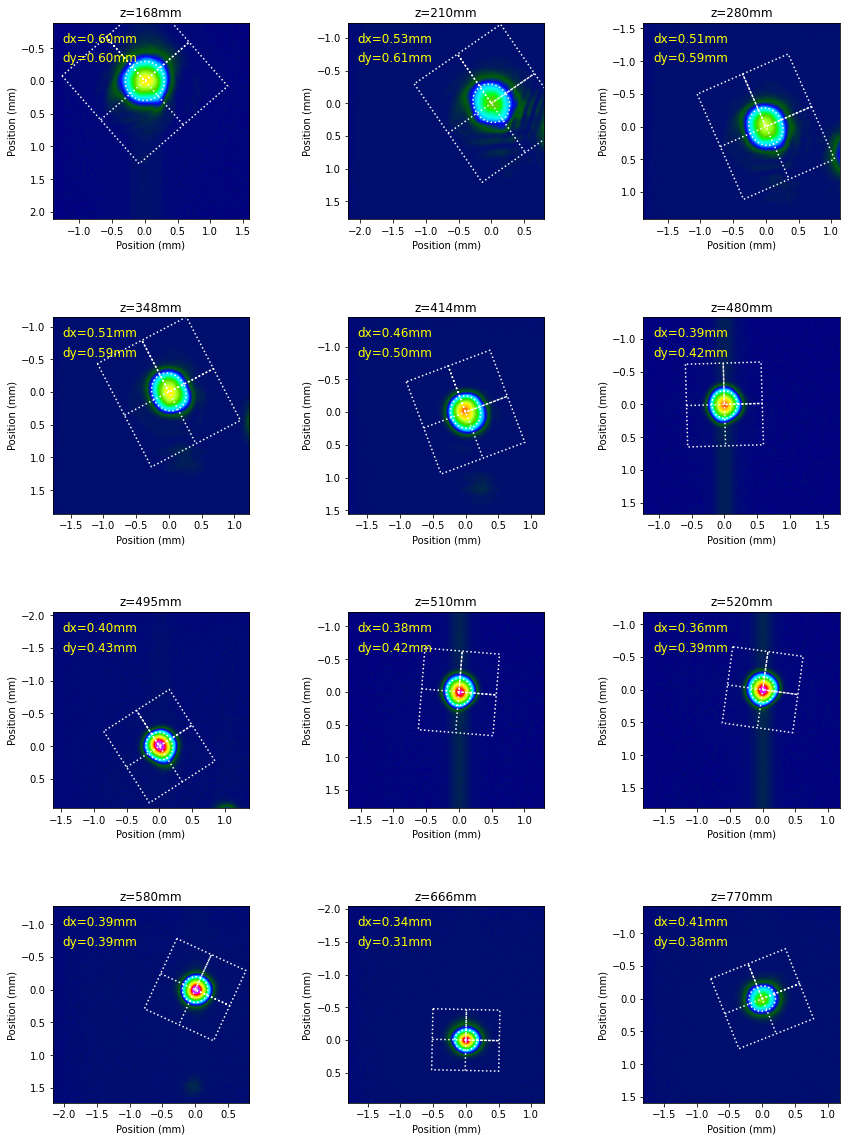

In [4]:
f, axs = plt.subplots(4,3,figsize=(15,15))

for i, image in enumerate(test_img):
    plt.subplot(4,3,i+1)

    xc, yc, dx, dy, phi = lbs.plot_beam_fit(image, pixel_size_mm, units='mm', vmax=255)

    plt.title('z=%.0fmm' % z1[i] )
    plt.text(0.05, 0.90, 'dx=%.2fmm' % (dx*pixel_size_mm), transform=plt.gca().transAxes, color='yellow', fontsize=12)
    plt.text(0.05, 0.80, 'dy=%.2fmm' % (dy*pixel_size_mm), transform=plt.gca().transAxes, color='yellow', fontsize=12)

plt.subplots_adjust(bottom=0.0, top=1.0, hspace=0.5)
plt.show()

The algorithm locates each beam and produces plausible beam diameters.  When the dotted rectangle is not entirely enclosed in the image (as in the first two images) then the diameters are suspect.  I talk more about this in the M$^2$ notebooks.